# PHREEQC Model Plotting
This notebook will plot your PHREEQC results along with your data. You will need to upload the analyzed adsorption data and the selected output file from PHREEQC. 


### Start this notebook by uploading your analyzed adsorption data and selected output file from PHREEQC.

In [22]:
# import the pandas module to store data in a dataframe
import pandas as pd

df1 = pd.read_csv("df.csv")
# This will automatically remove data that is below pH 4.5 or above pH9.5
for item in df1.index:
    if df1.loc[item]["pH"] < 4.5 or df1.loc[item]["pH"] > 9.5:
        df1.drop(item, inplace=True)
# load the selected output into a dataframe and specify that the data are separated by tabs
# the filename needs to match exactly the file uploaded in the previous cell
mod = pd.read_csv("selected_output_1.sel", sep="\t")
# get rid of the first row data (see comment above about why)
mod.drop([0], inplace=True)
mod.drop([1], inplace=True)
# get rid of extraneous whitespaces in the column headers
mod = mod.rename(columns=lambda x: x.strip())
# sort the data in acending order based on pH
mod.sort_values("pH", inplace=True)

,pH,m_Hfo_sOZn+,m_Hfo_wOZn+,Unnamed: 3
2,2.0,1.168900e-11,4.895800e-14,NaN
3,2.5,1.198700e-10,5.020600e-13,NaN
4,3.0,1.208500e-09,5.062100e-12,NaN
5,3.5,1.211300e-08,5.074100e-11,NaN
6,4.0,1.208500e-07,5.069200e-10,NaN
7,4.5,1.175600e-06,4.994400e-09,NaN
8,5.0,9.392500e-06,4.433200e-08,NaN
9,5.5,3.593000e-05,2.643500e-07,NaN
10,6.0,6.088800e-05,9.441900e-07,NaN
11,6.5,7.126400e-05,2.048300e-06,NaN


# Double check that the selected output looks correct

In [ ]:
mod

# Double check that the data looks correct

In [23]:
df1

,Unnamed: 0,solidconc_gL,std,abs,pH,sampabs,tot_zn_ppm,sampconc,Znads,Znadsper
0,0,22.0,0.46,0.028,1.859,0.234,5.0,4.730201,0.269799,5.395980
1,1,NaN,1.03,0.054,5.331,0.219,NaN,4.421695,0.578305,11.566106
2,2,NaN,3.02,0.148,5.778,0.124,NaN,2.467822,2.532178,50.643569
3,3,NaN,6.04,0.299,6.222,0.105,NaN,2.077047,2.922953,58.459062
4,4,NaN,NaN,NaN,6.232,0.121,NaN,2.406120,2.593880,51.877594
5,5,NaN,NaN,NaN,6.553,0.073,NaN,1.418900,3.581100,71.621997
6,6,NaN,NaN,NaN,6.730,0.090,NaN,1.768541,3.231459,64.629188
7,7,NaN,NaN,NaN,6.885,0.064,NaN,1.233796,3.766204,75.324072
8,8,NaN,NaN,NaN,7.155,0.051,NaN,0.966424,4.033576,80.671515
9,9,NaN,NaN,NaN,9.065,0.001,NaN,-0.061930,5.061930,101.238600


### PHREEQC speciates the Zn adsorption onto the strong and weak site separately. Consequently, we need to sum the weak and strong Zn surface complexes at each pH value in order to calculate total Zn adsorbed.

In [24]:
# Convert the total Zn used in the experiments from ppm to molality
znm = df1["tot_zn_ppm"][0] / 65380
# sum the Zn adsorbed on the strong and weak surface sites at each pH value
modznads = mod["m_Hfo_wOZn+"] + mod["m_Hfo_sOZn+"]
# calculate total zn adsorbed as a percent
modsper = (modznads / znm) * 100
# calcuate Zn adsorbed on the strong and weak site as percents
znstrong = mod["m_Hfo_sOZn+"] / znm * 100
znweak = mod["m_Hfo_wOZn+"] / znm * 100

### Now we can plot the experimental data and model result on the same plot. We can also add the predicted speciation of the Zn surface species.

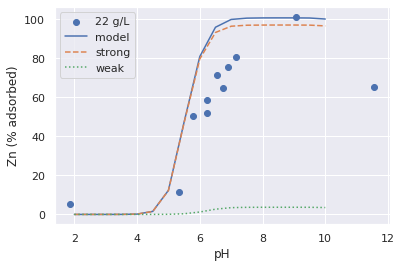

In [25]:
# I'll need to import a some modules for the plotting and downloading the plot.
import matplotlib.pyplot as plt

# to make the plots look nicer we will import the seaborn module
import seaborn as sns

sns.set()

plt.figure()
# I'll plot the data as points and the model as a line
plt.scatter(df1["pH"], df1["Znadsper"], label="data")
plt.plot(mod["pH"], modsper, label="model")
plt.plot(mod["pH"], znstrong, label="strong", linestyle="--")
plt.plot(mod["pH"], znweak, label="weak", linestyle=":")
# Label the x and y axes
plt.xlabel("pH")
plt.ylabel("Zn (% adsorbed)")

# Add a legend to the plot
plt.legend()

# Save and download the plot as pdf and png file
plt.savefig("zn_hfo_mod.pdf")